# Домашнее задание №3

Задание присылать на почту **aleksartmonov@gmail.com** в форматах *.ipynb* и отрендеренный результат в *.html*

В теме письма указать **AU2018 HW3 <Фамилия Имя>**

soft deadline: 18.03.2018T23:59:00+0300

hard deadline: 25.03.2018T23:59:00+0300


### Контуры, фильтрация, морфология

In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
%matplotlib inline

def show(img, size=5):
    plt.figure(figsize=(size,size))
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


**1. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором удален весь текст и оставлены только границы таблицы

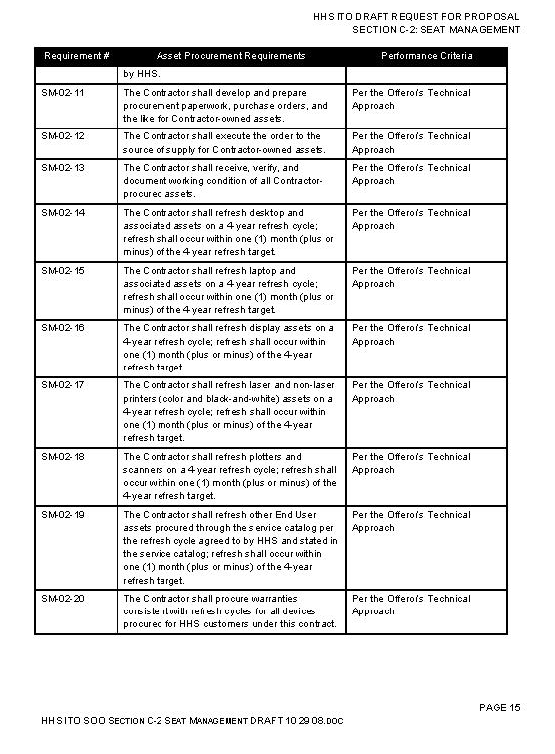

In [2]:
table = cv2.imread("table.jpg")
show(table, size=10)

In [3]:
def remove_text(table, num_iter, num_ker, first_row=False):
    hor = table.copy()
    vert = table.copy()
    
    if first_row:
        hor = cv2.erode(hor, np.ones((1,2)), iterations=6)    
        vert = cv2.erode(vert, np.ones((2,1)), iterations=6)
        
    hor = cv2.dilate(hor, np.ones((1,num_ker)), iterations=num_iter)
    hor = cv2.erode(hor, np.ones((1,num_ker)), iterations=num_iter)

    vert = cv2.dilate(vert, np.ones((num_ker,1)), iterations=num_iter)
    vert = cv2.erode(vert, np.ones((num_ker,1)), iterations=num_iter)

    res = np.minimum(hor, vert)

    show(res, 10)

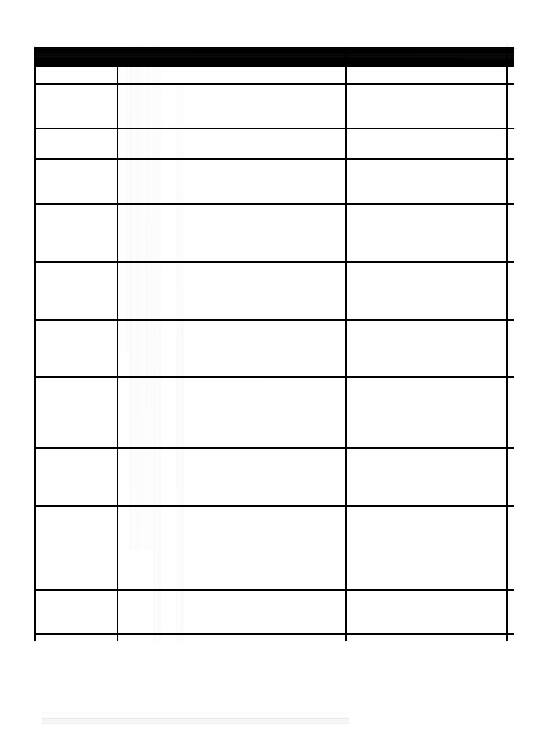

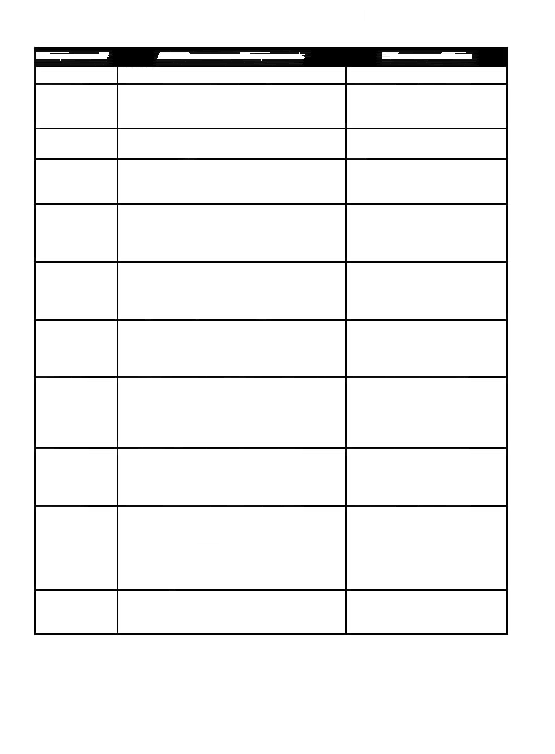

In [4]:
remove_text(table, num_iter=30, num_ker=11, first_row=True)
remove_text(table, num_iter=5, num_ker=5)

**2. (5 баллов) ** Отделите монеты от фона на изображении $coins\_1.jpg$, отсортируйте монеты по убыванию размера. Сгенерируйте результирующее изображение с цветной разметкой областей, соответствующих монетам на исходном изображении: на черном фоне должны быть выделены разными цветами области, соответствующие монетам. В центре каждой выделенной области разместите порядковый номер монеты в соответствии с сортировкой монет по размеру (в центре области, соответствующей самой большой монете, должно стоять число 1)

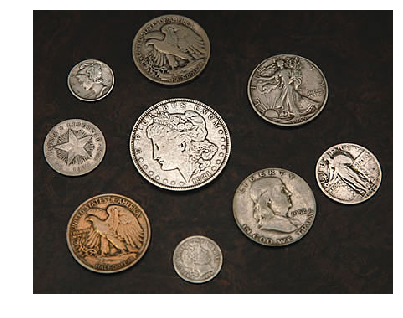

In [5]:
coins_1 = cv2.imread("coins_1.jpg")
show(coins_1)

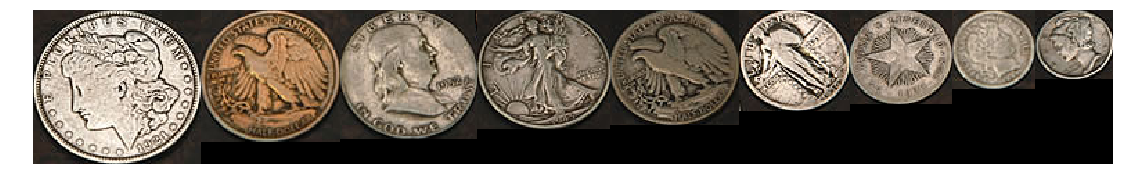

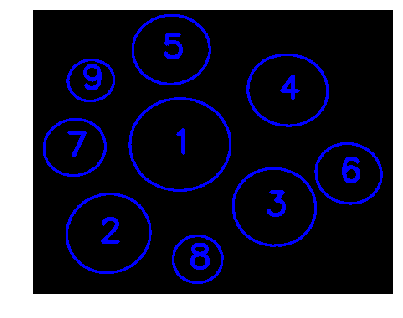

In [6]:
imgray = cv2.cvtColor(coins_1, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(imgray, 70, 255, 0)
_, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
res = np.zeros_like(coins_1)

ind = np.argsort(np.array([cv2.contourArea(c) for c in contours]))[::-1]
contours = np.array(contours)[ind]

coins = []
h, w = 0, 0

for i, c in enumerate(contours):
    mask = np.zeros_like(imgray)
    cv2.drawContours(mask, [c], -1, 255, -1)
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    coins.append(coins_1[topx:bottomx+1, topy:bottomy+1, :].copy())
    h = max(h, bottomx+1 - topx)
    w += bottomy+1 - topy

    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    cv2.drawContours(res, [c], -1, (255, 0, 0), 2)
    cv2.putText(res, str(i + 1), (cX - 10, cY + 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255, 0, 0), 3)

coins_sorted = np.zeros((h, w, 3), dtype=np.uint8)
ptr = 0
for coin in coins:
    coins_sorted[:coin.shape[0], ptr:ptr+coin.shape[1] ,:] = coin
    ptr += coin.shape[1]
    
show(coins_sorted, 15)
    
show(res)

**3. (5 баллов)** Отделите монеты от текста на изображении $coins\_2.jpg.$ Сгене- рируйте по входному изображению два изображения: на одном должны остаться только монеты, весь текст должен быть удален; на втором изображении должен остаться только текст, все монеты должны быть удалены.

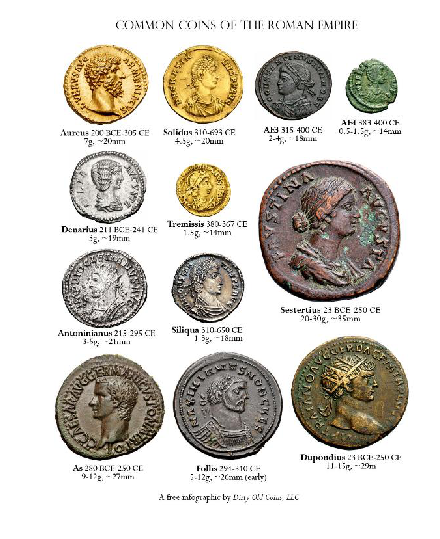

In [7]:
coins_2 = cv2.imread("coins_2.jpg")
show(coins_2, size=7)

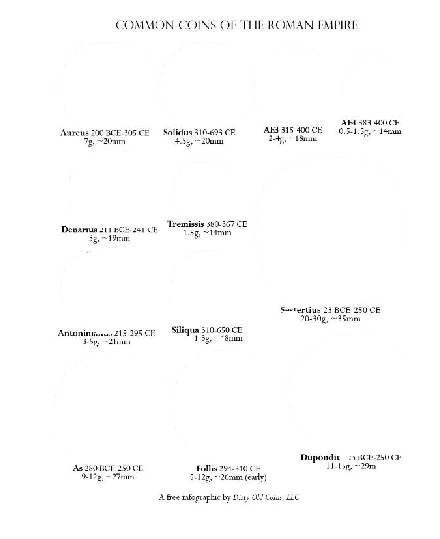

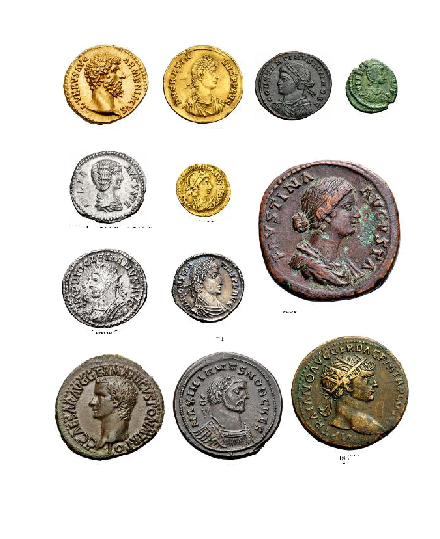

In [8]:
res = cv2.dilate(coins_2, np.ones((2,2)), iterations=6)
res = cv2.erode(res, np.ones((5,5)), iterations=3)
res = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

text = np.zeros_like(coins_2) + 255
text[res == 255] = coins_2[res == 255]

show(text, size=7)

coins = coins_2.copy()
coins[text != 255] = 255

show(coins, size=7)

**4. (10 баллов) ** Для каждого из зашумленных изображений $coins\_noize\_1.jpg$, $coins\_noize\_2.jpg$, $coins\_noize\_3.jpg$: выделите целые монеты, сгруппируйте их по размеру и посчитайте число монет в каждой группе. На выходе программа должна выдавать полученное число групп монет, средний размер монеты для каждой группы и число монет в каждой группе, а также изображение, визуализирующее результат. На данном изображении на черном фоне должны быть цветом выделены области, соответствующие монетам. Монеты, принадлежащие одной группе, должны быть обозначены одним и тем же цветом. 

>лучше поверх картинок полупрозрачным фоном раскрасить монетки

Это творческое задание, можно использовать функции типа *HoughCircles, fitEllipse* и тд. 

In [9]:
pictures = ["coins_noize_1.jpg","coins_noize_2.jpg","coins_noize_3.jpg"]
# show(np.vstack(cv2.imread(x) for x in pictures), size=20)

In [10]:
# path: 'coins_noize_1.jpg' | 'coins_noize_2.jpg' | 'coins_noize_3.jpg'
# threshhold: 150 | 200 | None
# dp: 1.4 | 1.5 | 0.2
# param2: 13 | 13 | 25

def group_coins(path='coins_noize_1.jpg', threshhold=150, dp=1.4, param2=13):
    img = cv2.imread(path)
    img = cv2.medianBlur(img, 3)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if threshhold is not None:
        _, imgray = cv2.threshold(imgray, threshhold, 255, 0)
        
    circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    imgray = cv2.erode(imgray, circle)
    
    circles = cv2.HoughCircles(imgray,cv2.HOUGH_GRADIENT,dp,60,param1=2,param2=param2,minRadius=30,maxRadius=50)
    circles = np.uint16(np.around(circles))

    res = img.copy()
    small = []
    medium = []
    big = []

    for i in circles[0,:]:
        if i[0] < 40 or i[0] > 600 or i[1] < 40 or i[1] > 350:
            continue
        if i[2] > 44:
            clr = (255, 0, 0)
            big.append(i[2])
        elif i[2] < 36:
            clr = (0, 255, 0)
            small.append(i[2])
        else:
            clr = (0, 0, 255)
            medium.append(i[2])
        cv2.circle(res,(i[0],i[1]),i[2],clr,2)

    big = np.array(big)
    small = np.array(small)
    medium = np.array(medium)
        
    print('Number of groups: 3.')
    print('Small: {} (green), medium: {} (red), big: {} (blue).'.format(len(small), len(medium), len(big)))
    print('Avg sizes: small -- {}, medium -- {}, big -- {}.'.format(small.mean(), medium.mean(), big.mean()))
    
    show(res, 7)

Number of groups: 3.
Small: 10 (green), medium: 12 (red), big: 8 (blue).
Avg sizes: small -- 33.4, medium -- 38.75, big -- 46.75.


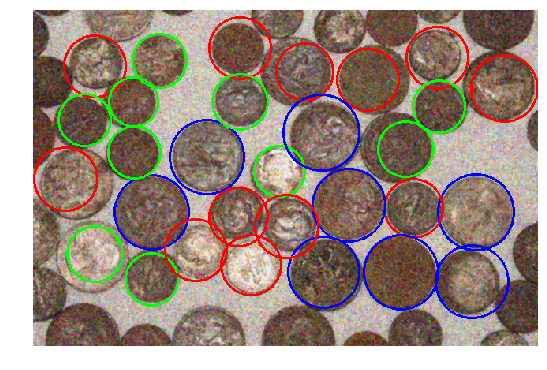

In [11]:
group_coins(path='coins_noize_1.jpg', threshhold=150, dp=1.4, param2=13)

Number of groups: 3.
Small: 8 (green), medium: 11 (red), big: 10 (blue).
Avg sizes: small -- 33.25, medium -- 39.81818181818182, big -- 47.8.


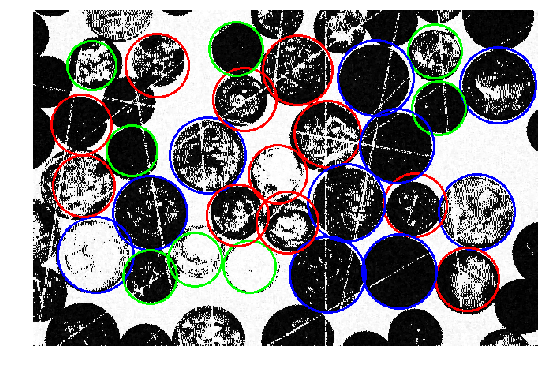

In [12]:
group_coins(path='coins_noize_2.jpg', threshhold=200, dp=1.5, param2=13)

Number of groups: 3.
Small: 11 (green), medium: 7 (red), big: 12 (blue).
Avg sizes: small -- 33.0, medium -- 39.285714285714285, big -- 47.166666666666664.


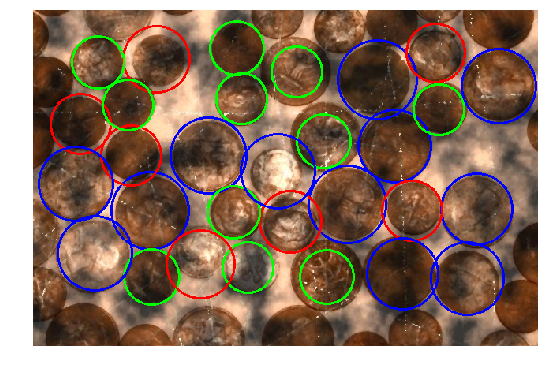

In [13]:
group_coins(path='coins_noize_3.jpg', threshhold=None, dp=0.2, param2=25)

### Сравнение глобальных признаков 

Для задач 5 и 6 надо реализовать общую функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор) 
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

In [14]:
from os import listdir

In [15]:
def find_nearest_pairs(images, n, comparator):
    num = len(images)
    mins = np.zeros((3, n), dtype=float) + np.inf
    for i in range(num):
        for j in range(i+1, num):
            d = comparator(images[i], images[j])
            if d < mins[0].max():
                mins[1, np.argmax(mins[0])] = i
                mins[2, np.argmax(mins[0])] = j
                mins[0, np.argmax(mins[0])] = d
    return mins[1:].astype(int)

https://youtu.be/tEVeGIQiVvw?t=23m17s

**5. (10 баллов)** Посмотрите на изображения в папке *Coral*. Посчитайте гистограммы изображений. Выведите на экран 20 пар изображений с максимально похожими гистограммами. В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

In [16]:
l2_comp = lambda x, y: np.mean(np.array([np.sqrt(np.sum((x[i] - y[i])**2)) for i in range(3)]))
X2_comp = lambda x, y: np.mean(np.array([np.sum((x[i] - y[i])**2 / (x[i] + y[i])) / 2 for i in range(3)]))
int_comp = lambda x, y: np.mean(np.array([1 - np.sum(np.minimum(x[i], y[i])) for i in range(3)]))

In [17]:
def get_desc(clr, bins): # cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2HSV, cv2.COLOR_BGR2LAB
    dirname = 'datasets/Corel/'

    filenames = [dirname + file for file in listdir(dirname)]

    imgs_BGR = [cv2.imread(filename)[5:-5, 5:-5, :] for filename in filenames]
    imgs = [cv2.cvtColor(img, clr) for img in imgs_BGR]

    desc = [[np.histogram(img[:,:,i].flatten(), bins)[0]/len(img[:,:,i].flatten()) for i in range(3)]
            for img in imgs]

    return desc

In [18]:
def show_pairs(ids):
    dirname = 'datasets/Corel/'
    filenames = [dirname + file for file in listdir(dirname)]
    
    num = ids.shape[1]
    for i in range(num):
        x, y = ids[:, i]
        show(cv2.imread(filenames[x]))
        show(cv2.imread(filenames[y]))

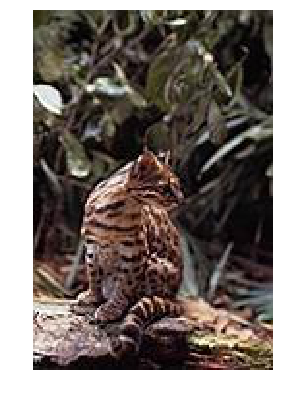

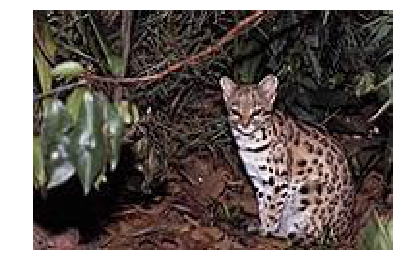

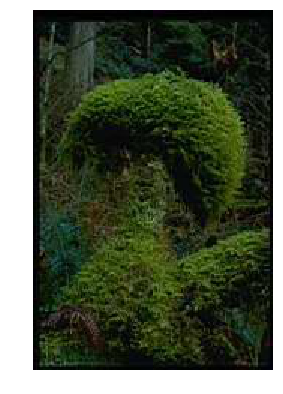

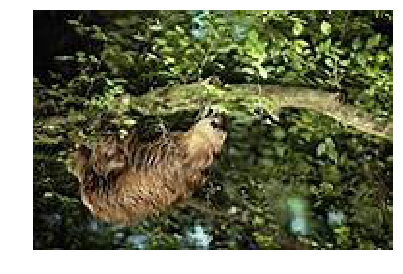

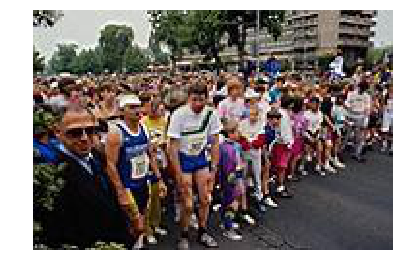

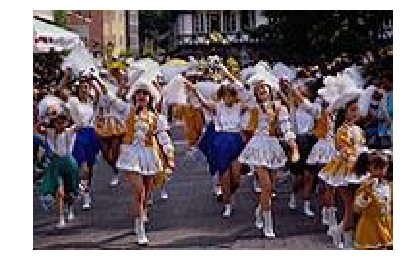

In [19]:
show_pairs(find_nearest_pairs(get_desc(cv2.COLOR_BGR2RGB, 10), 3, l2_comp))

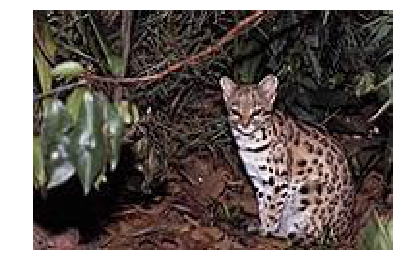

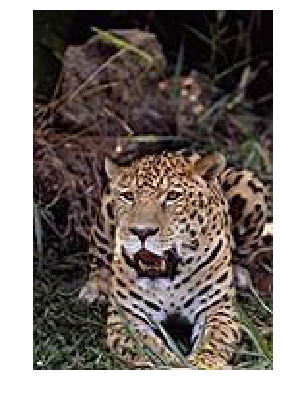

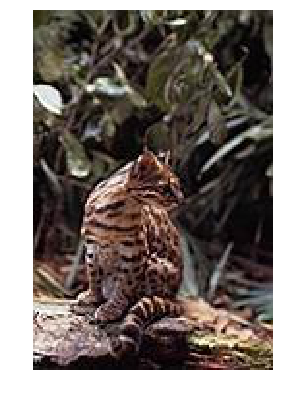

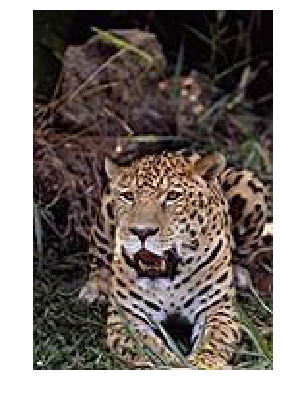

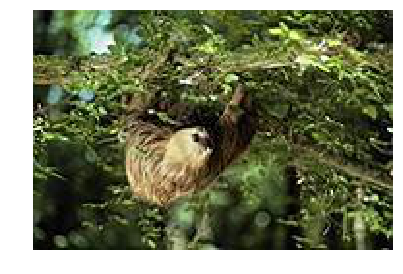

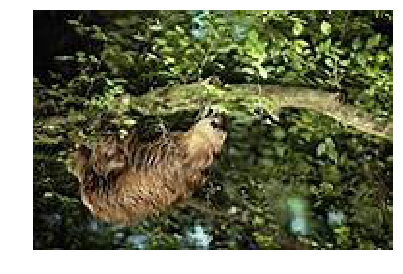

In [20]:
show_pairs(find_nearest_pairs(get_desc(cv2.COLOR_BGR2HSV, 10), 3, l2_comp))

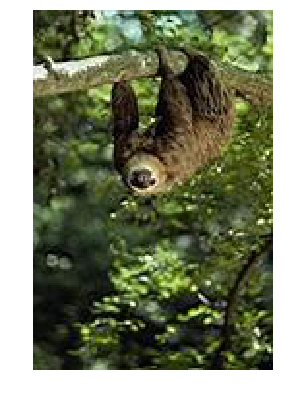

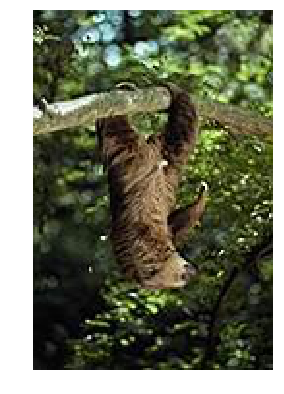

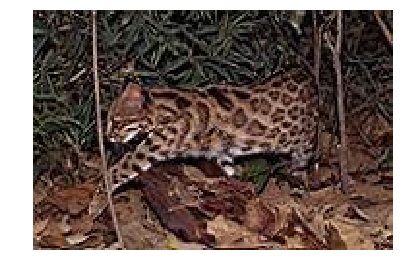

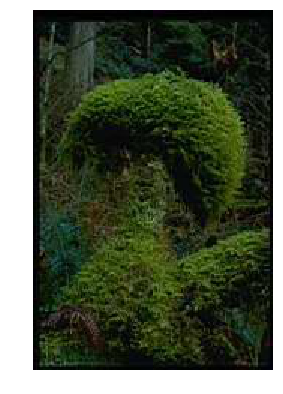

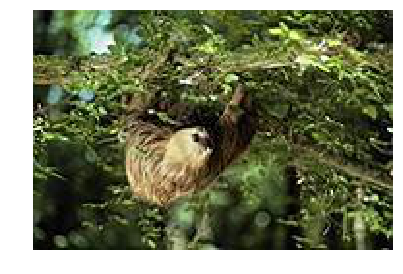

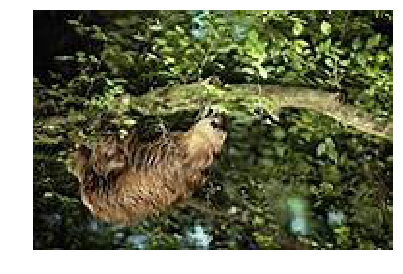

In [21]:
show_pairs(find_nearest_pairs(get_desc(cv2.COLOR_BGR2LAB, 10), 3, l2_comp))

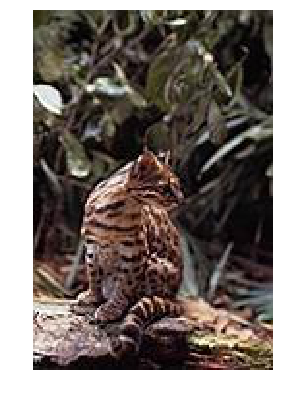

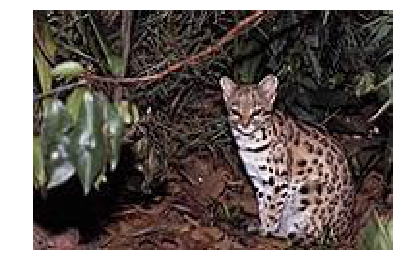

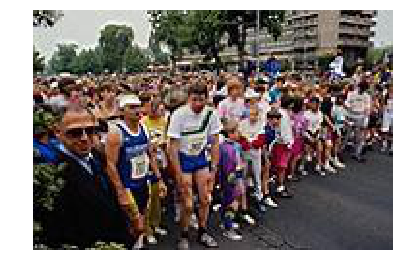

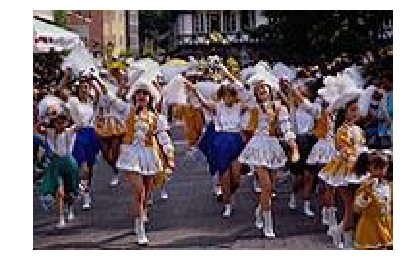

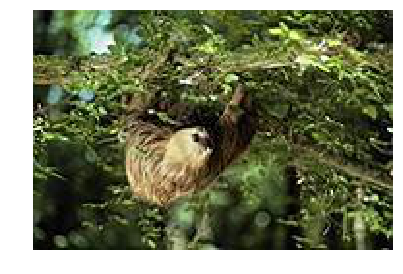

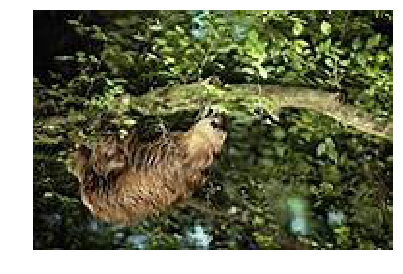

In [22]:
show_pairs(find_nearest_pairs(get_desc(cv2.COLOR_BGR2RGB, 10), 3, X2_comp))

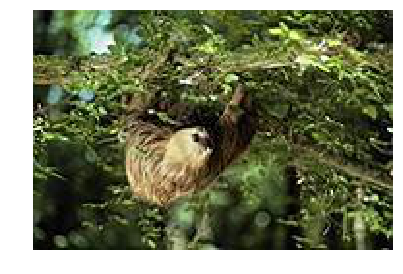

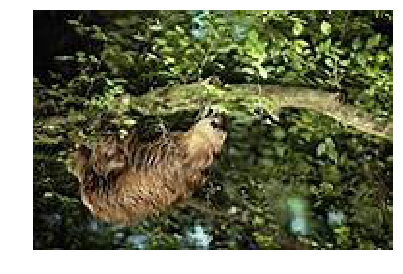

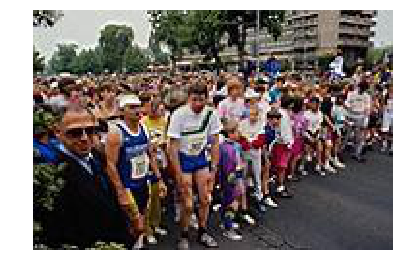

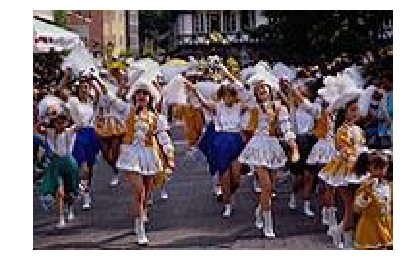

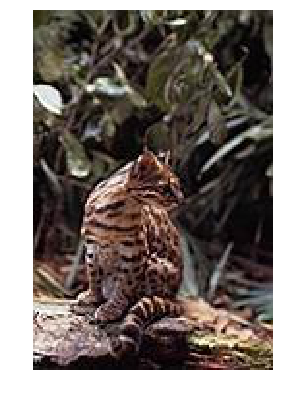

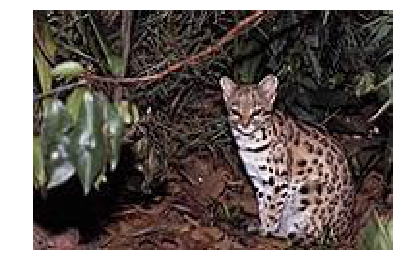

In [23]:
show_pairs(find_nearest_pairs(get_desc(cv2.COLOR_BGR2RGB, 10), 3, int_comp))

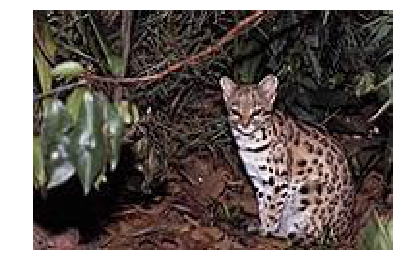

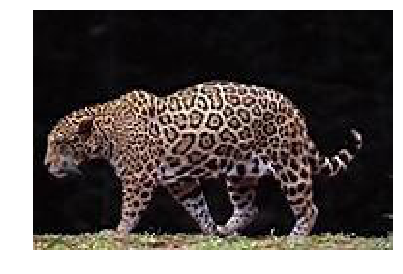

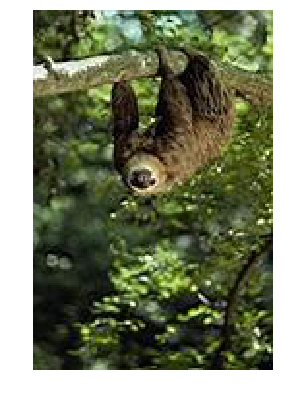

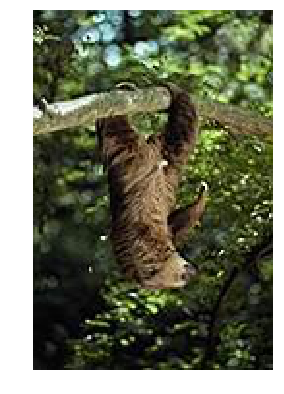

In [24]:
show_pairs(find_nearest_pairs(get_desc(cv2.COLOR_BGR2RGB, 2), 2, l2_comp))

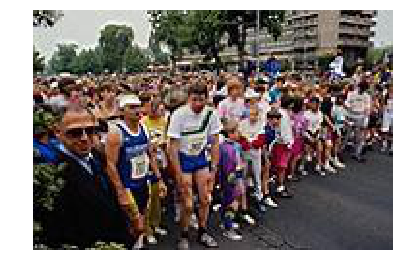

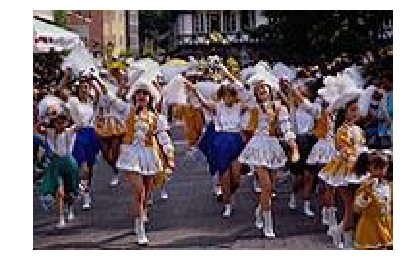

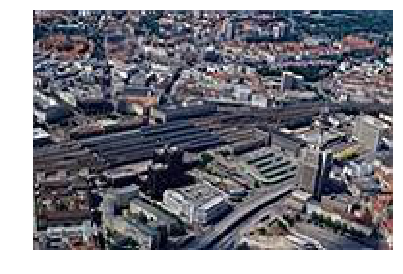

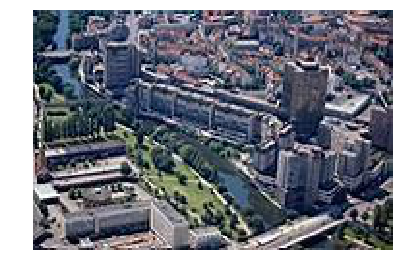

In [25]:
show_pairs(find_nearest_pairs(get_desc(cv2.COLOR_BGR2RGB, 100), 2, l2_comp))

**6. (10 баллов)** Посмотрите на изображения в папке *leaves*. Посчитайте дескрипторы Фурье для каждого листочка изображений. Выведите на экран 20 пар изображений с максимально похожими дескрипторами.

In [26]:
dirname = 'datasets/leaves/'

filenames = [dirname + file for file in listdir(dirname)]

imgs_BGR = [cv2.imread(filename) for filename in filenames]

In [27]:
def truncate_descriptor(descriptors, degree):
    """this function truncates an unshifted fourier descriptor array
    and returns one also unshifted"""
    descriptors = np.fft.fftshift(descriptors)
    center_index = len(descriptors) / 2
    descriptors = descriptors[
        int(center_index - degree / 2):int(center_index + degree / 2)]
    descriptors = np.fft.ifftshift(descriptors)
    return descriptors

def findDescriptor(img):
    """ findDescriptor(img) finds and returns the
    Fourier-Descriptor of the image contour"""
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(imgray, 70, 255, 0)
    contour = []
    _, contour, hierarchy = cv2.findContours(
        thresh,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE,
        contour)
    contour_array = contour[0][:, 0, :]
    contour_complex = np.empty(contour_array.shape[:-1], dtype=complex)
    contour_complex.real = contour_array[:, 0]
    contour_complex.imag = contour_array[:, 1]
    fourier_result = np.fft.fft(contour_complex)
    return truncate_descriptor(fourier_result, degree=4)

In [28]:
comp = lambda x, y: np.sqrt(np.sum(np.abs(x - y)**2))

In [29]:
def show_leaves_pairs(ids):
    dirname = 'datasets/leaves/'
    filenames = [dirname + file for file in listdir(dirname)]

    num = ids.shape[1]
    for i in range(num):
        x, y = ids[:, i]
        show(cv2.imread(filenames[x]))
        show(cv2.imread(filenames[y]))

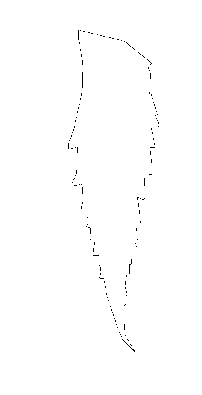

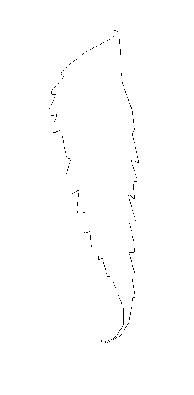

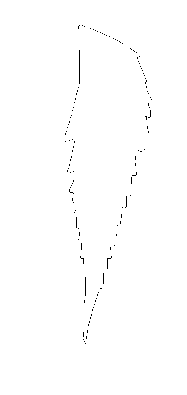

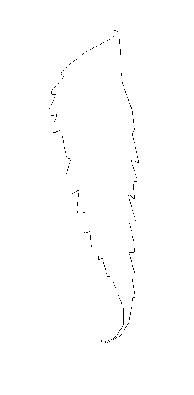

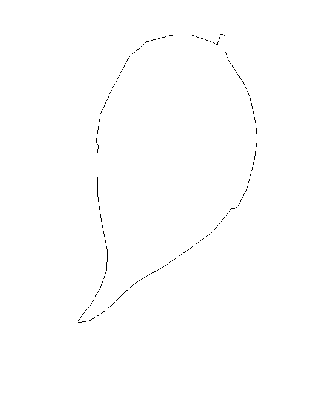

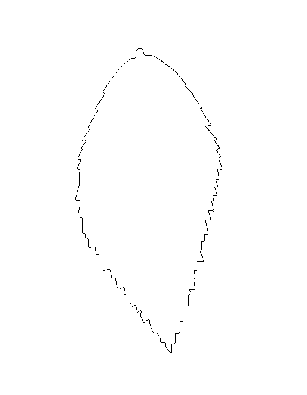

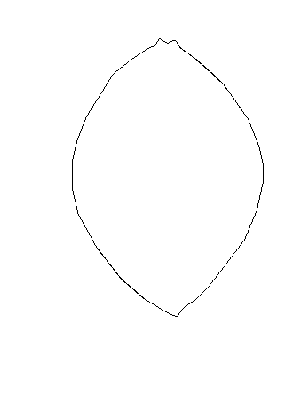

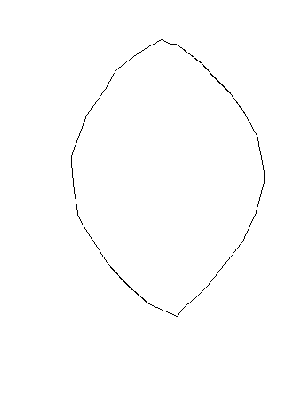

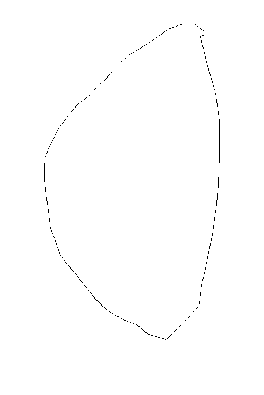

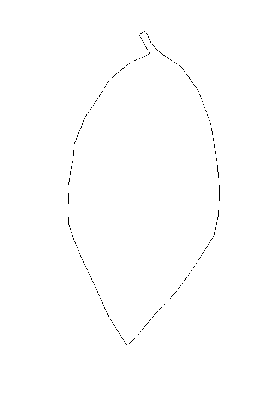

In [30]:
show_leaves_pairs(find_nearest_pairs([findDescriptor(img) for img in imgs_BGR], 5, comp))